# Heloc w/SEDC Data insights

This might help us gain som insight into why it is such a difficult to predict the expected explanation label. 

In [1]:
import pandas
with_explanations = pandas.read_csv('../data/heloc_with_explanations.csv')
heloc = pandas.read_csv('../data/heloc_dataset_v1.csv')

## Distribution of training data classes

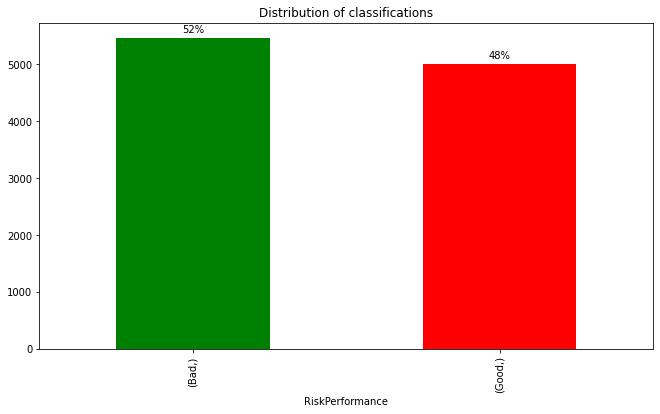

In [2]:
RiskCounts = with_explanations.value_counts(subset=["RiskPerformance"])
count_sum = len(with_explanations.iloc[:,0])
ax = RiskCounts.plot(kind="bar", title="Distribution of classifications", color = list('gr'), figsize=(11,6))

# Add percentages to bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{(height/count_sum):.0%}', (x + width/2, y + height*1.02), ha='center')

## Original duplicates vs. removed -7 and -9 rows

The dataset contains a lot of rows with -9, which indicates that all data is missing or corrupted.
-7 is used for individual values that is missing.

<AxesSubplot:title={'center':'Duplicates with -7 and -9 removed'}, ylabel='Duplicates'>

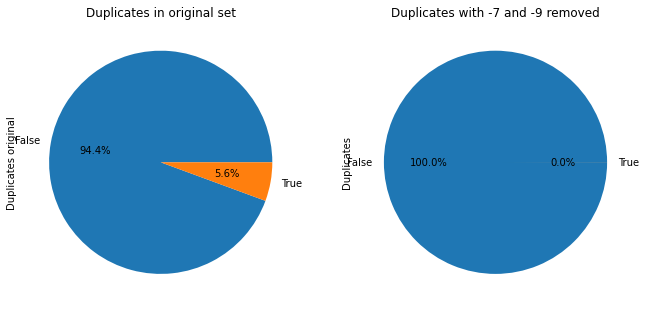

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,6))
# Original
dupes = heloc.duplicated()
dupes_count= dupes.value_counts()
dupes_count.plot(kind="pie", title="Duplicates in original set", ax=ax1, ylabel="Duplicates original", autopct="%1.1f%%")

# Pruned
pruned = pandas.read_csv('../data/heloc_dataset_v1_pruned.csv')
pruned_dupes = pruned.duplicated().value_counts()
pruned_dupes.plot(kind="pie", title="Duplicates with -7 and -9 removed", ax=ax2, ylabel="Duplicates", autopct="%1.1f%%")

It is an interesting note that there are absolutely no duplicates when the -9 and -7 rows are removed.

## Distribution of explanations

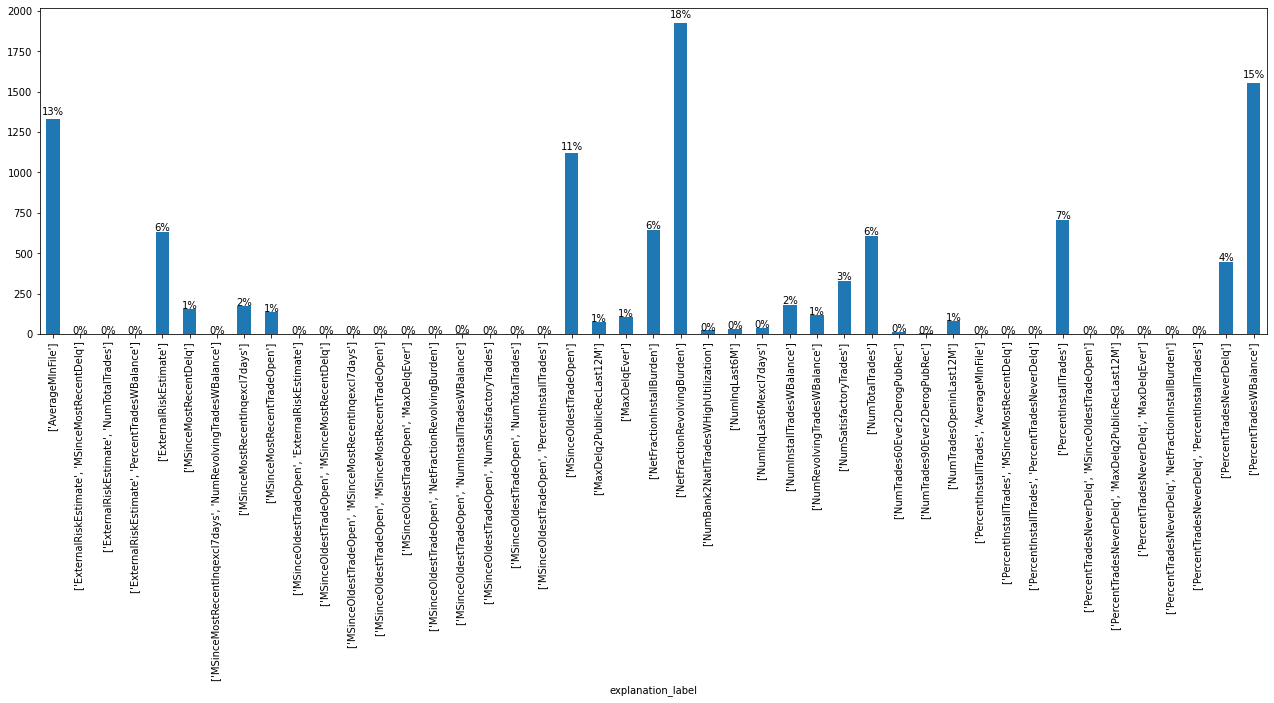

In [4]:
grouped = with_explanations.groupby(by="explanation_label")
bars = grouped.size().plot(kind="bar", figsize=(22,6))
count_sum = with_explanations.shape[0]

for p in bars.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    bars.annotate(f'{(height/count_sum):.0%}', (x + width/2, y + height*1.02), ha='center')


## Value-spreads for each explanations

#### Scatter

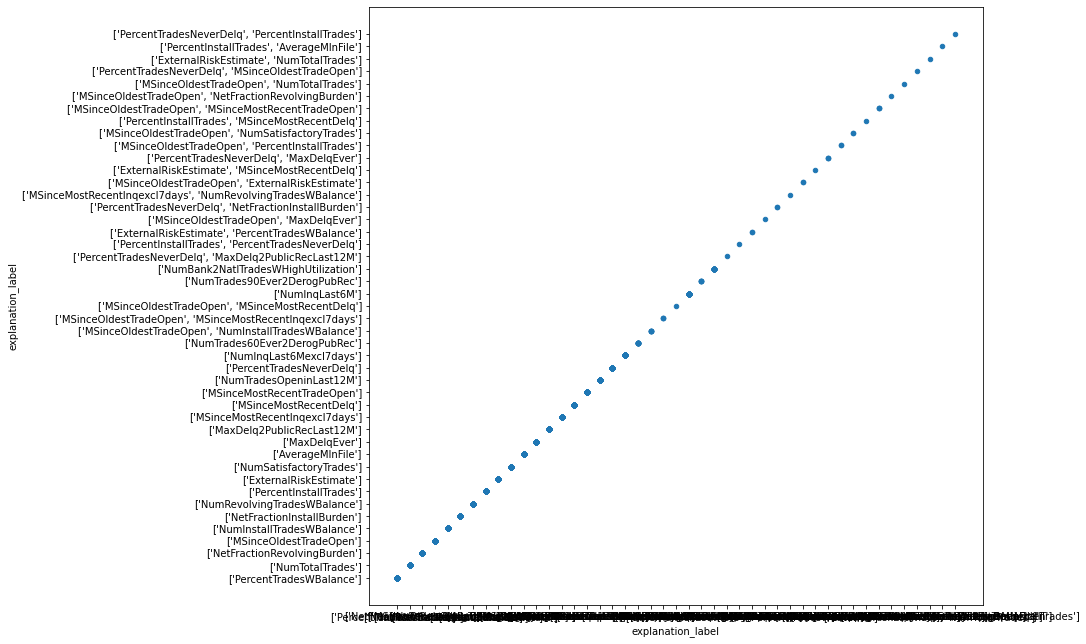

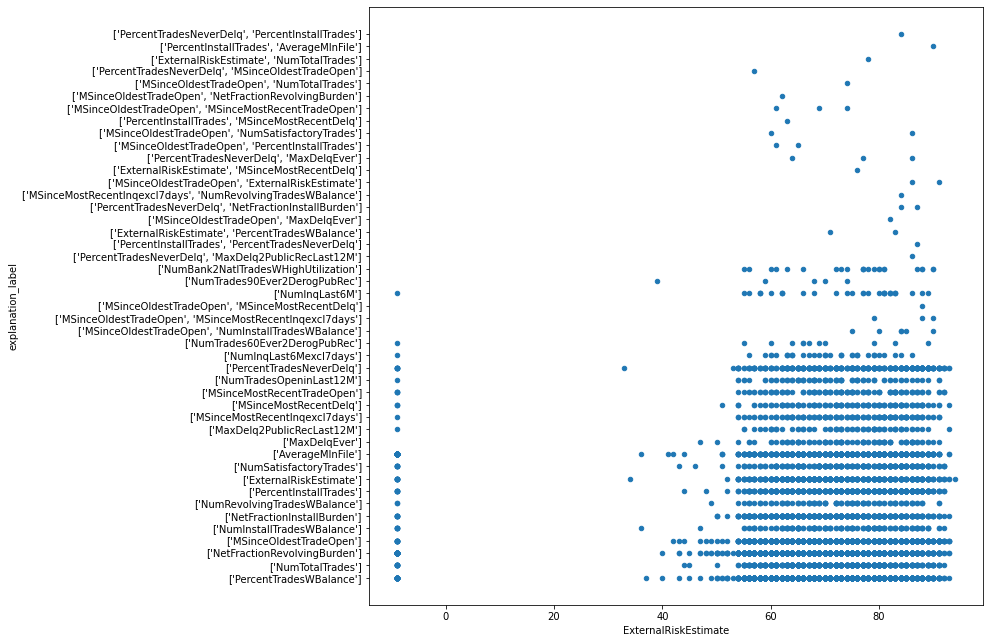

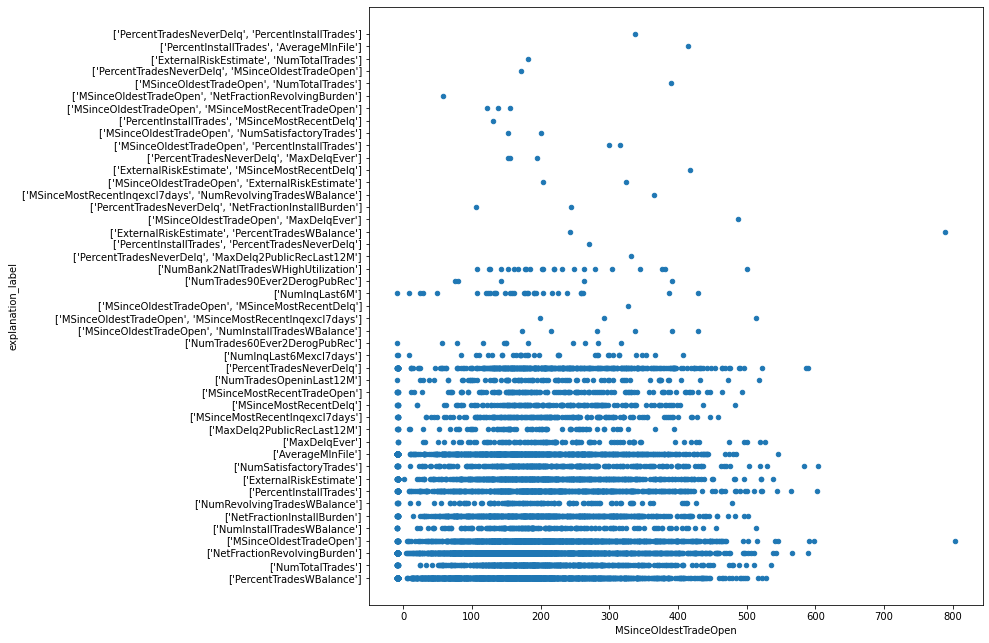

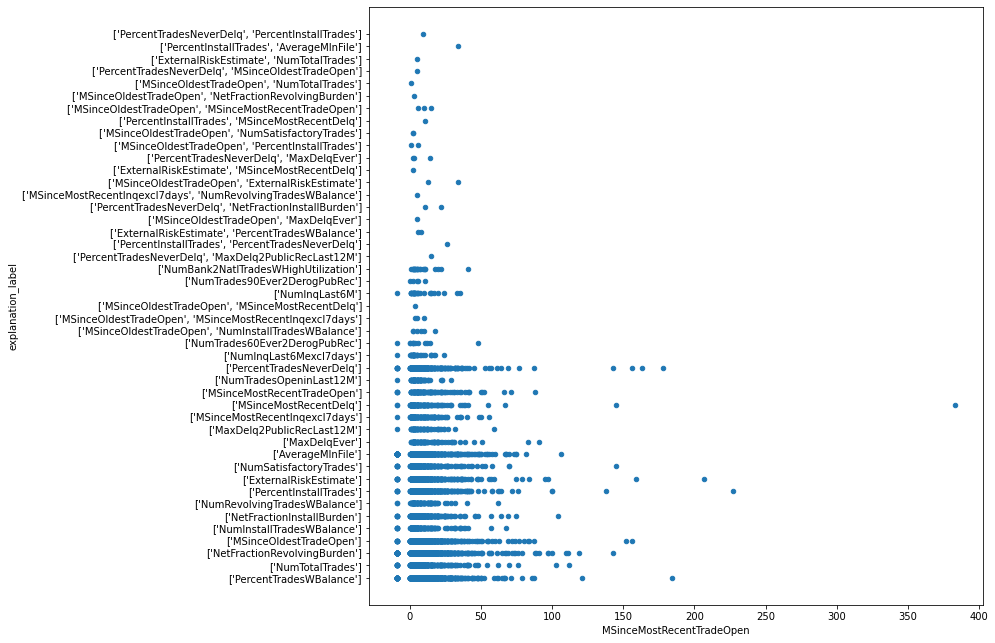

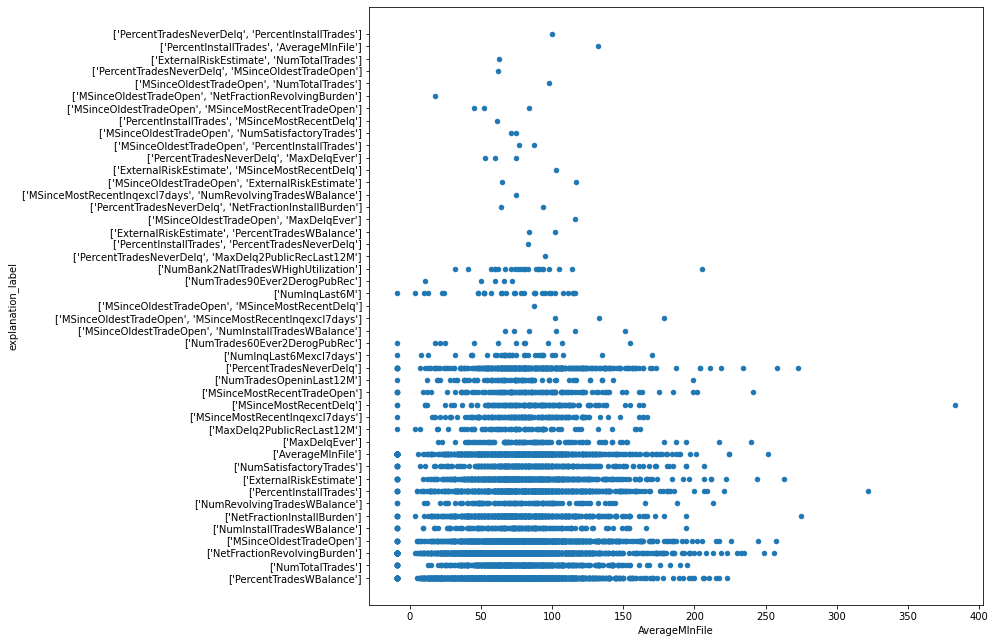

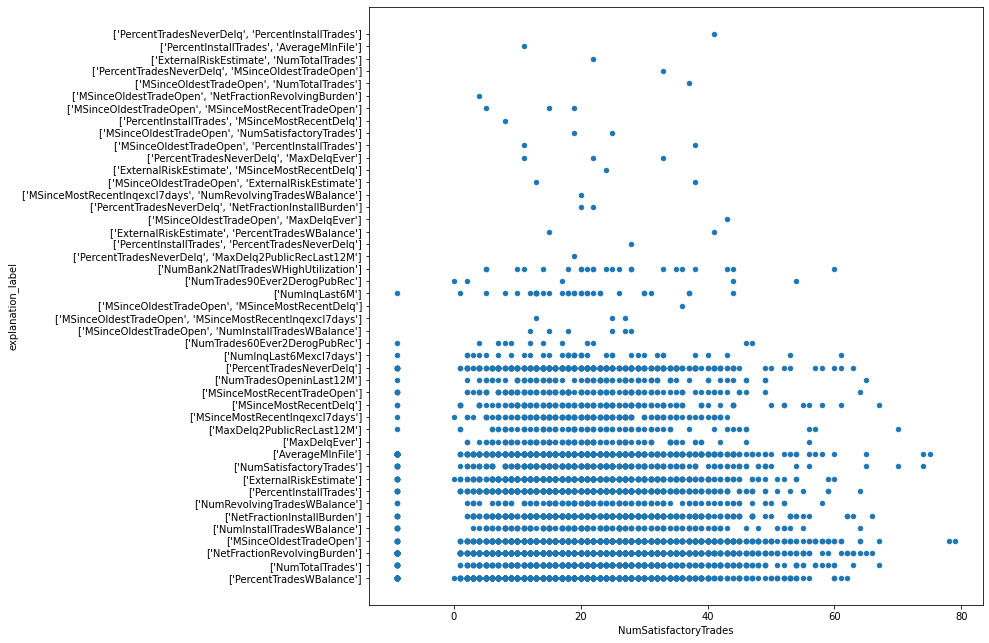

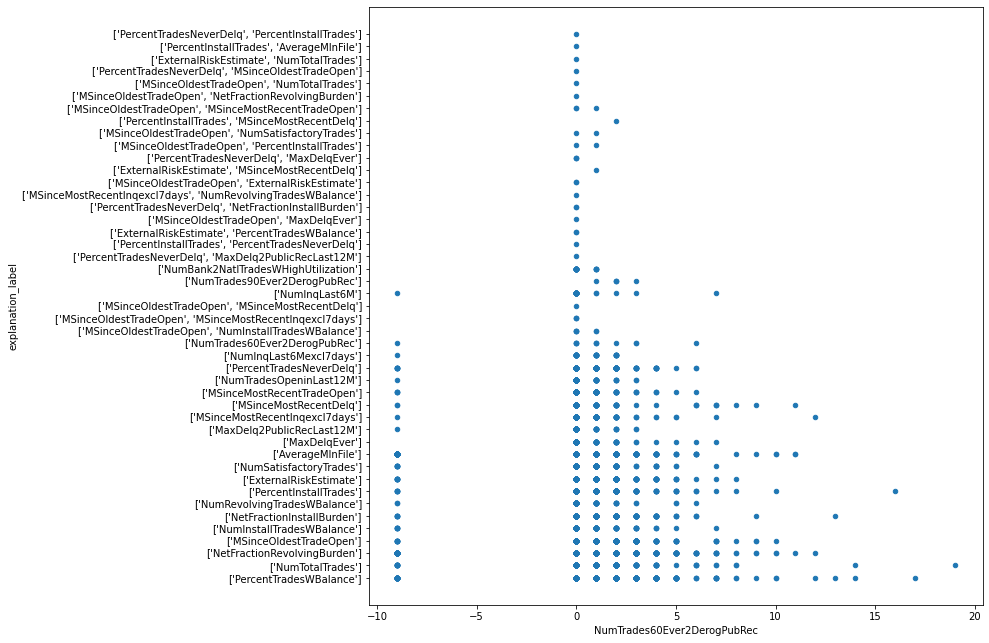

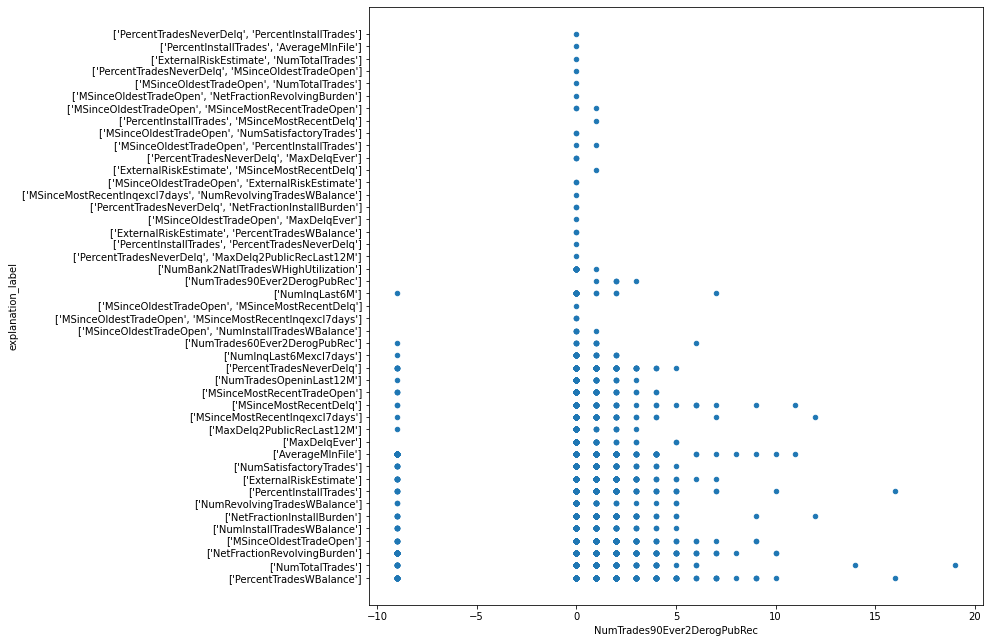

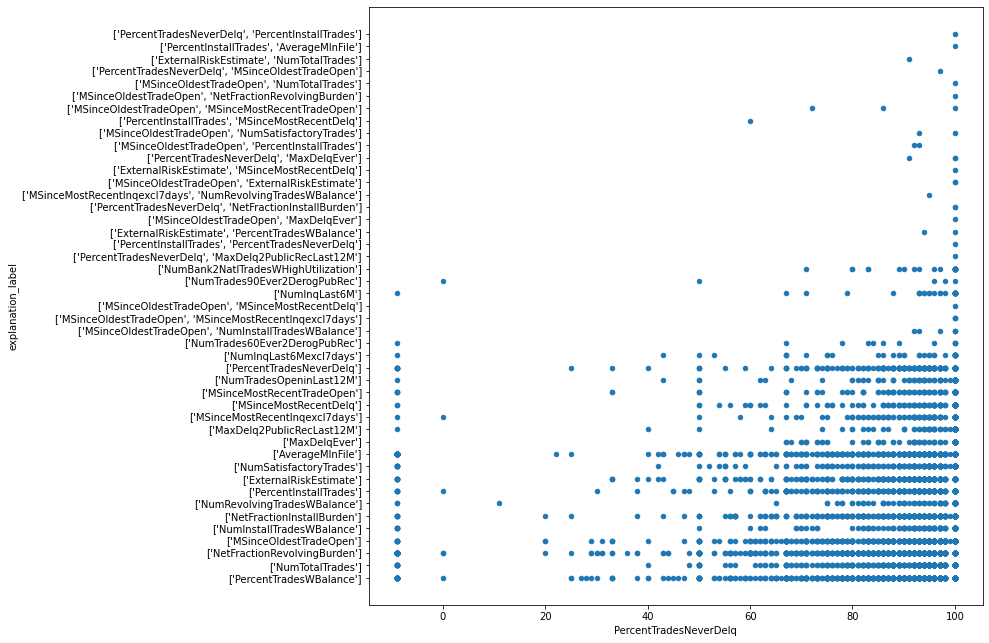

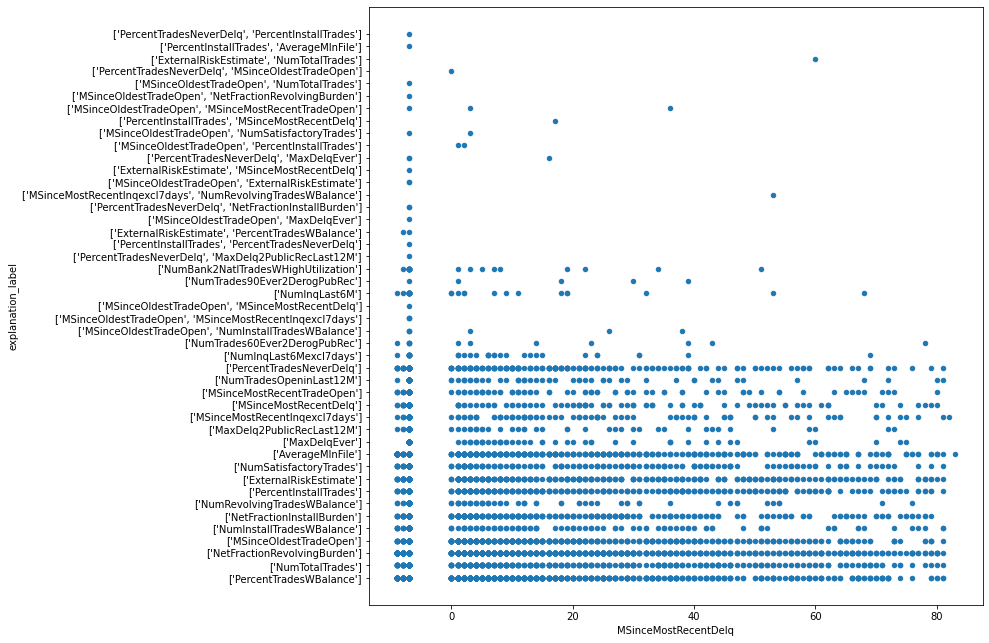

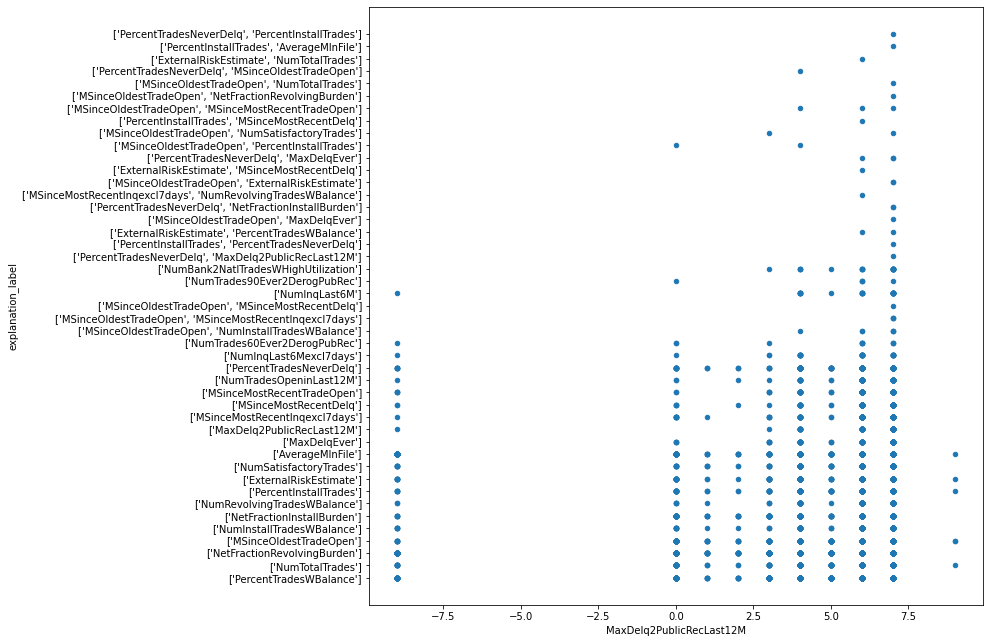

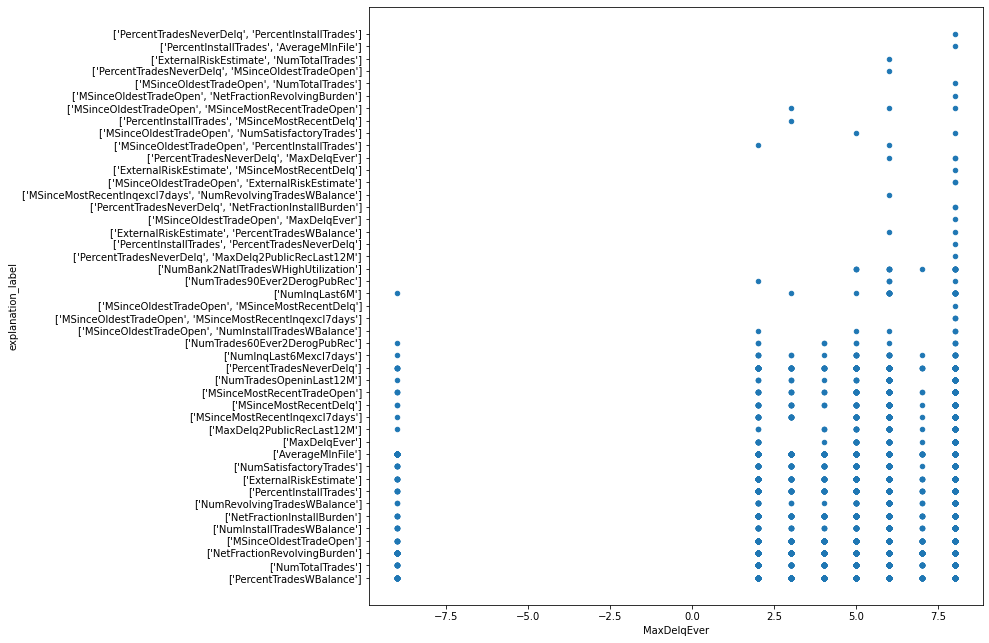

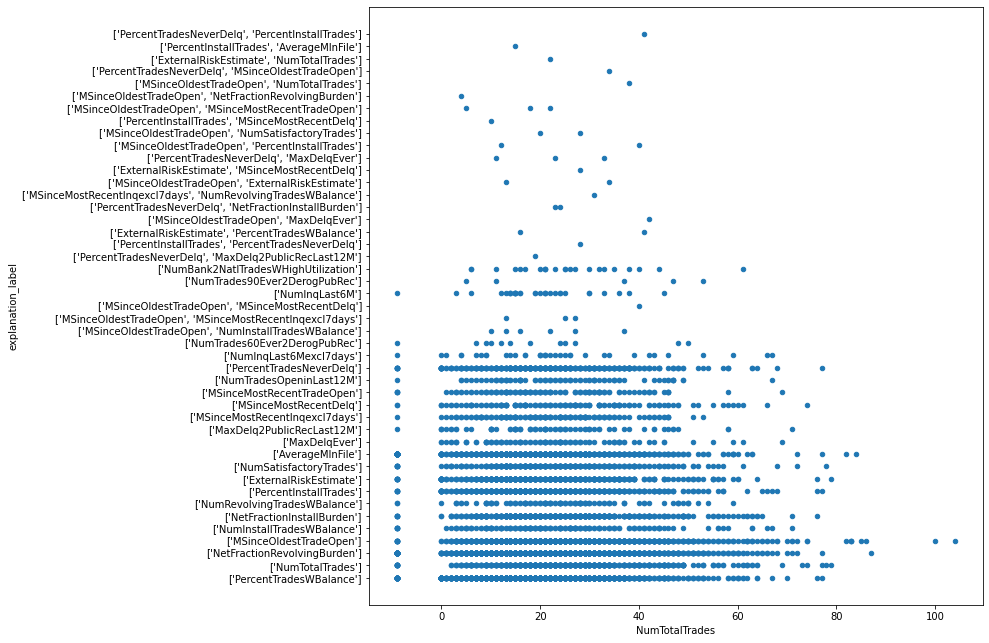

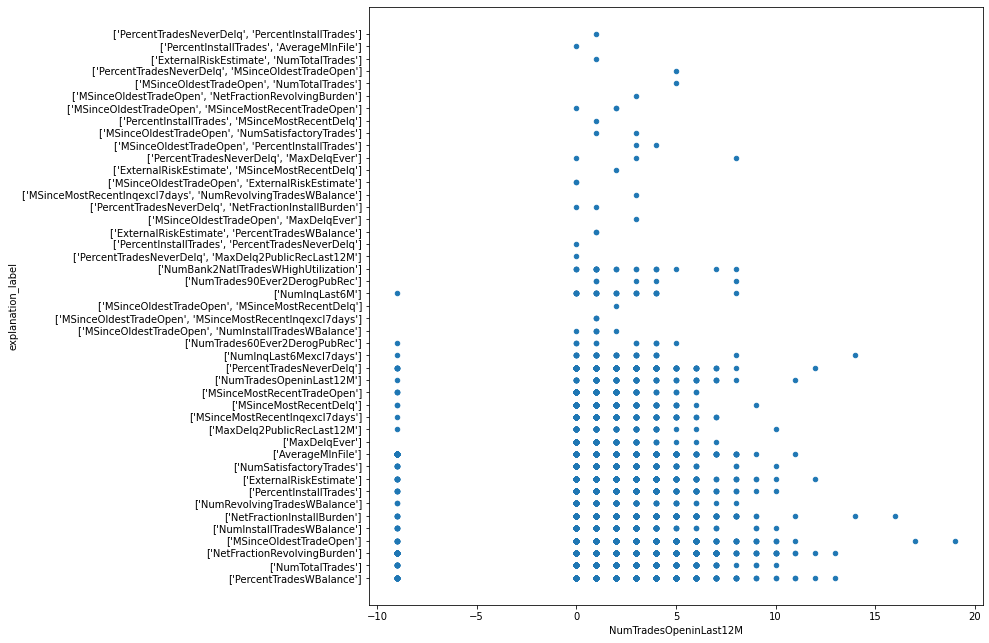

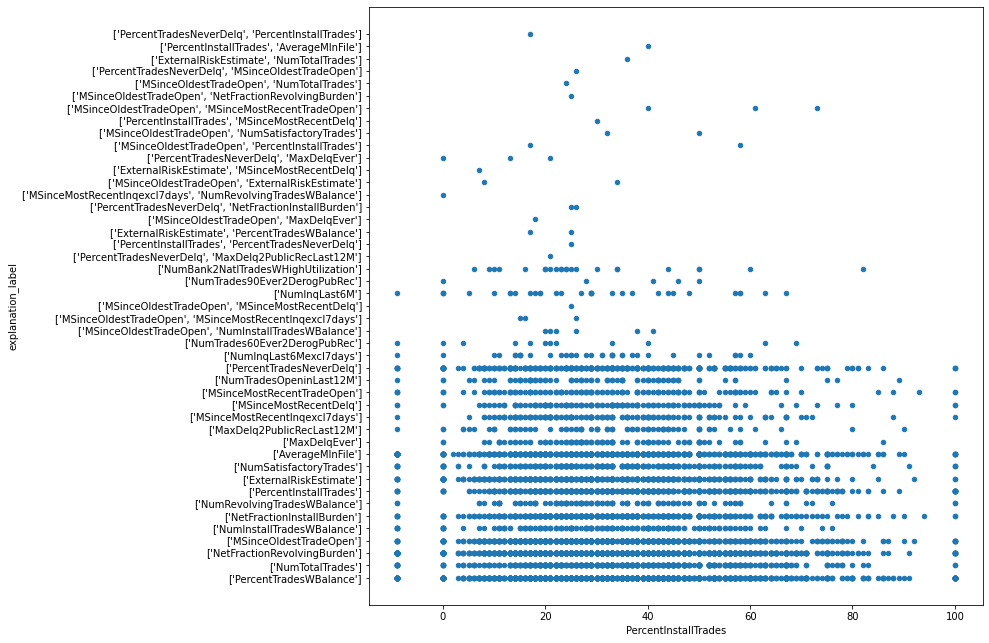

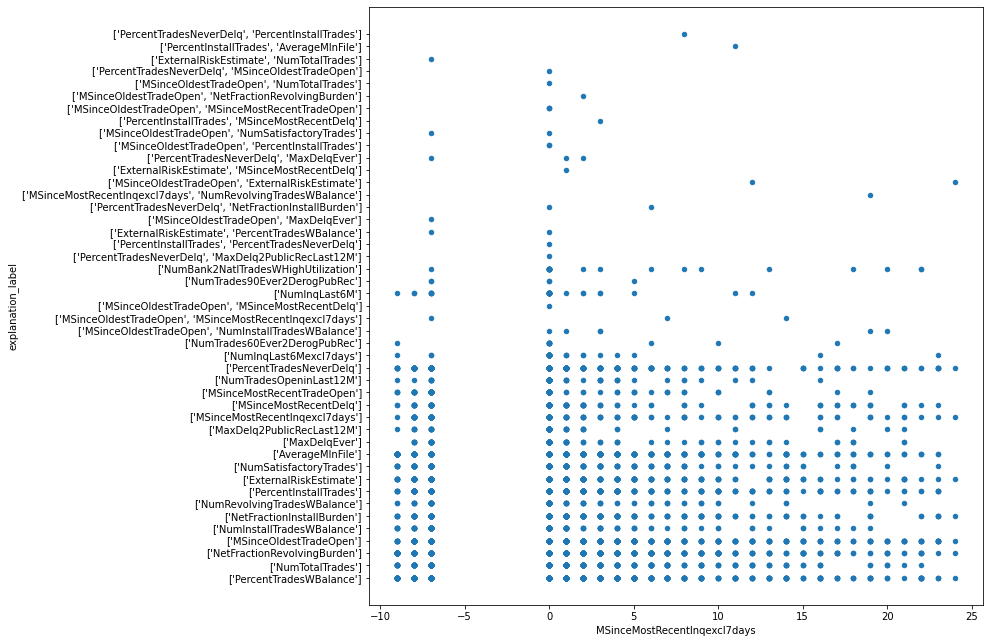

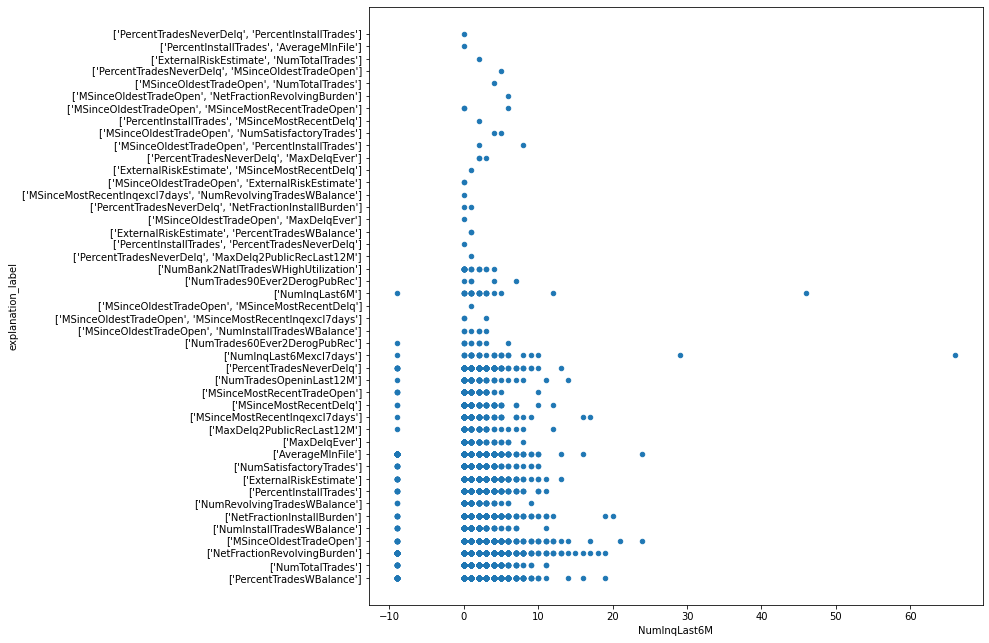

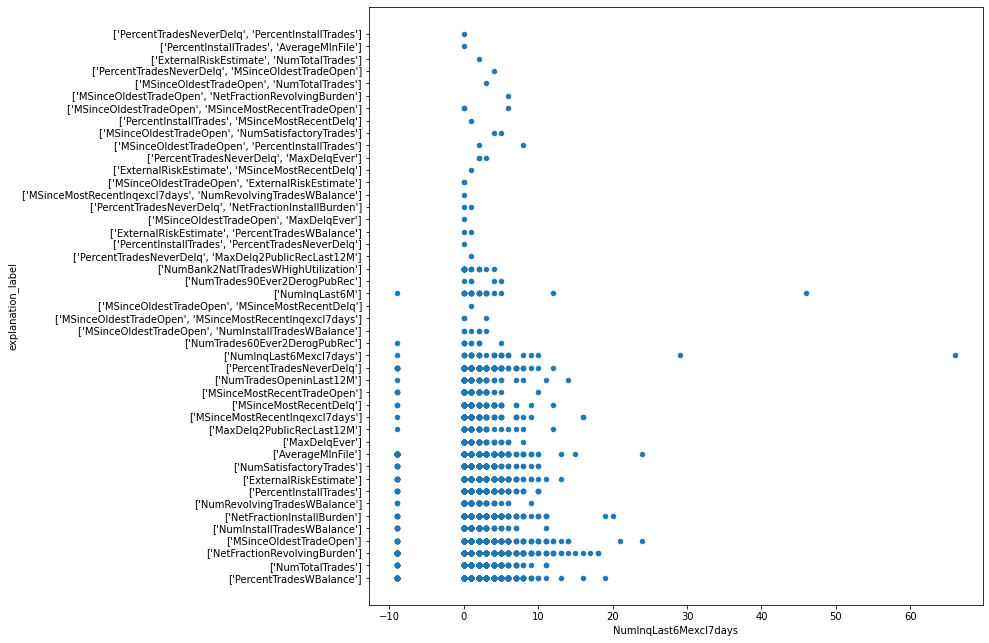

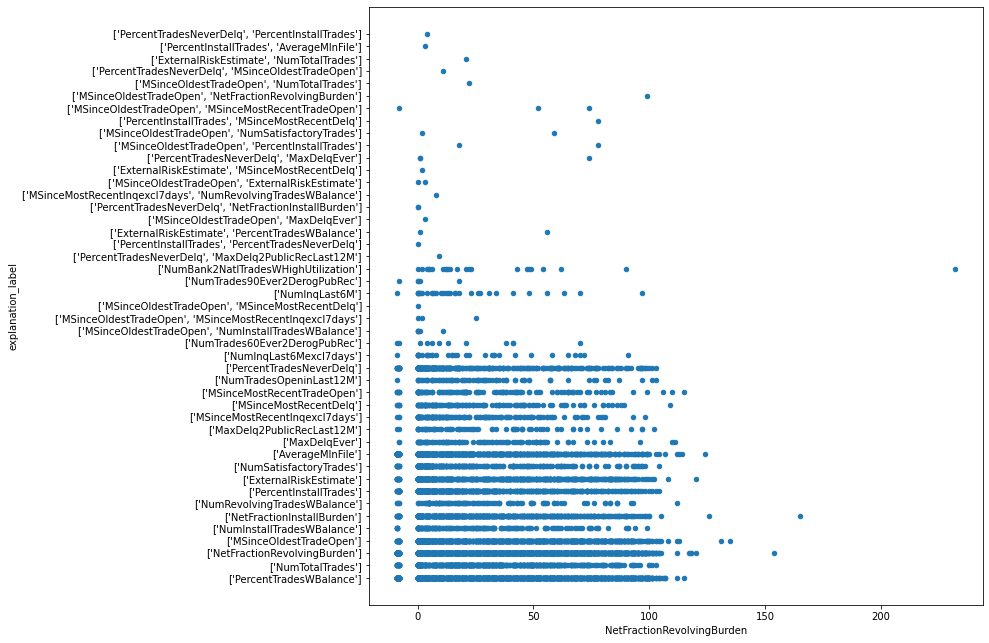

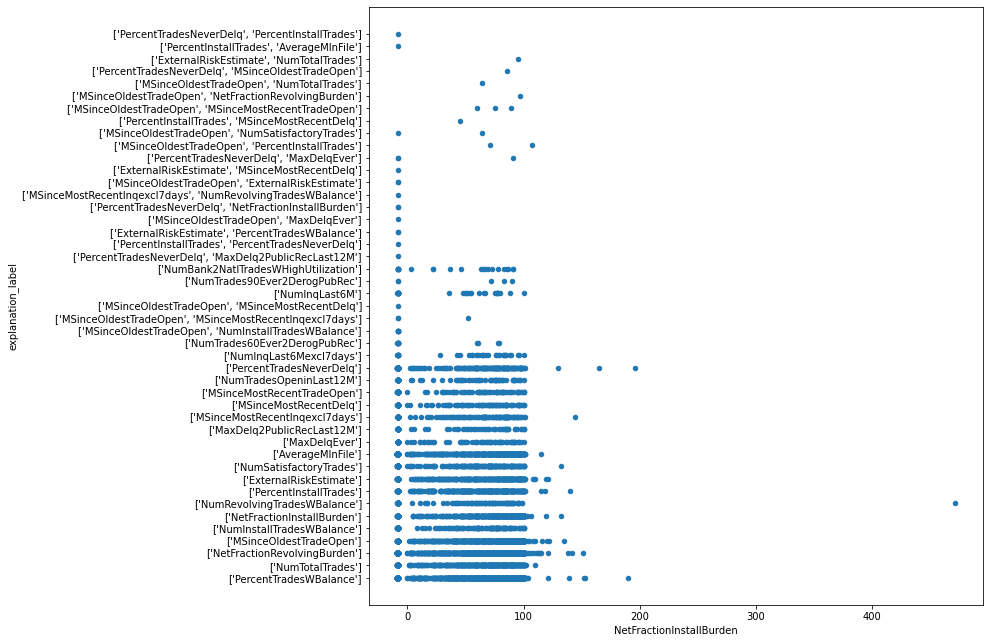

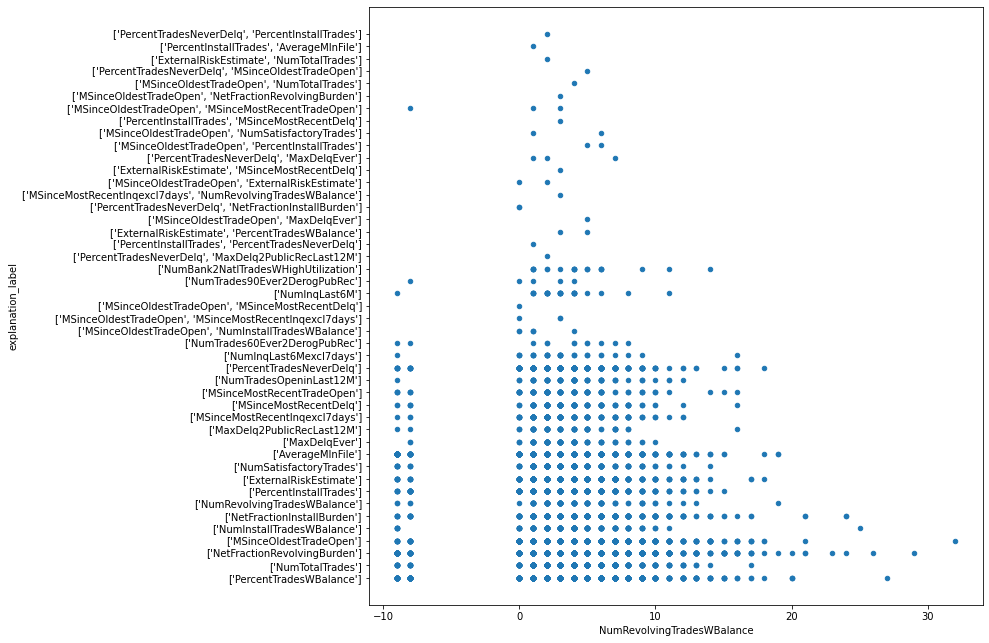

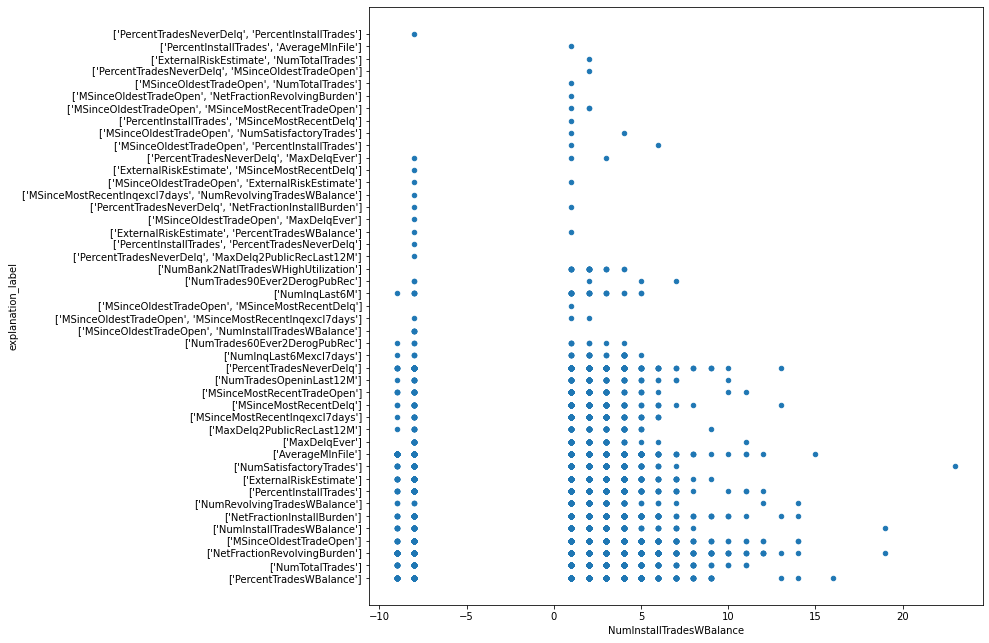

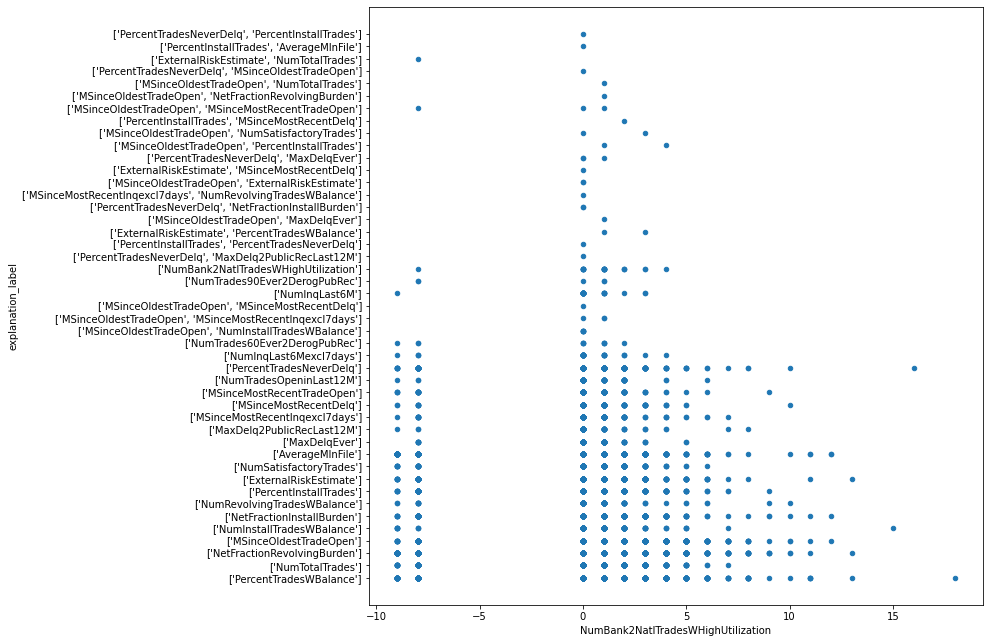

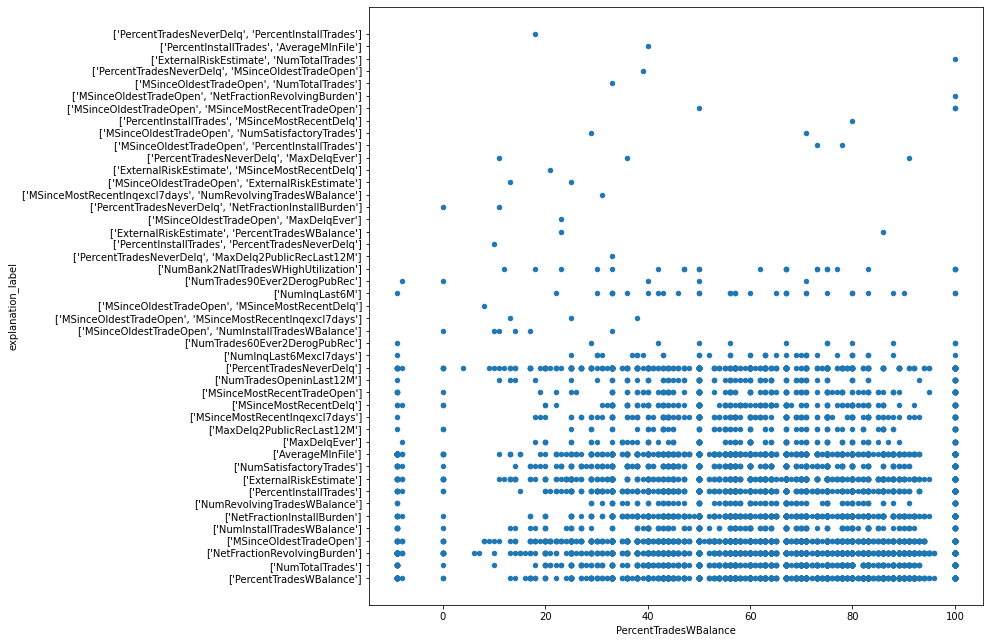

In [57]:
for column in with_explanations.columns[2:]:
    with_explanations.plot(kind="scatter", x=column, y='explanation_label', figsize=(11,11))

#### Box

ExternalRiskEstimate
MSinceOldestTradeOpen
MSinceMostRecentTradeOpen
AverageMInFile
NumSatisfactoryTrades
NumTrades60Ever2DerogPubRec
NumTrades90Ever2DerogPubRec
PercentTradesNeverDelq
MSinceMostRecentDelq
MaxDelq2PublicRecLast12M
MaxDelqEver
NumTotalTrades
NumTradesOpeninLast12M
PercentInstallTrades
MSinceMostRecentInqexcl7days
NumInqLast6M
NumInqLast6Mexcl7days
NetFractionRevolvingBurden
NetFractionInstallBurden
NumRevolvingTradesWBalance
NumInstallTradesWBalance
NumBank2NatlTradesWHighUtilization
PercentTradesWBalance


/home/johannes/.cache/pypoetry/virtualenvs/friendly-enigma-VO-70bG1-py3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


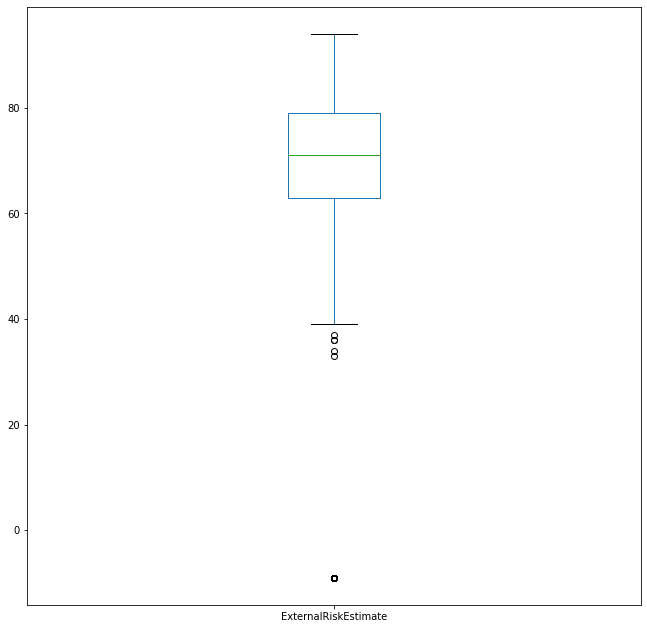

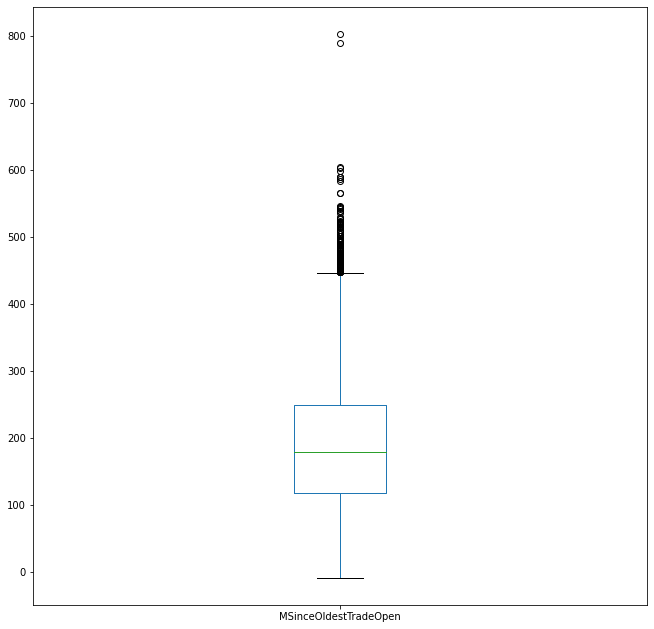

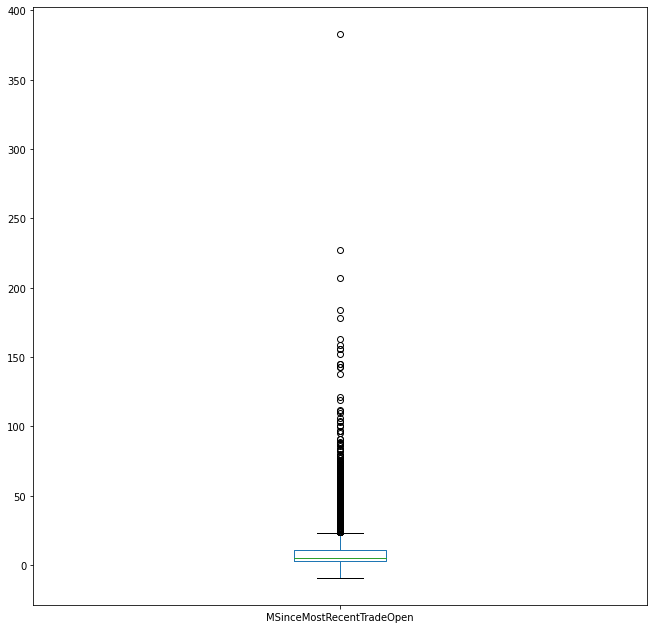

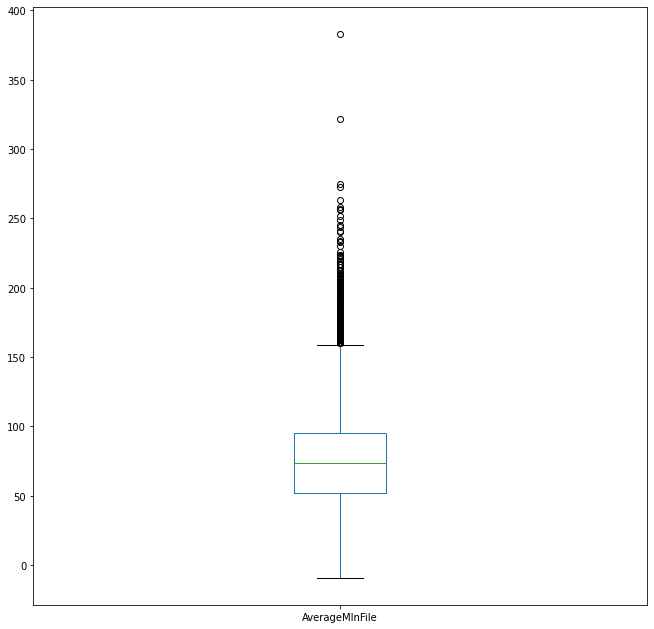

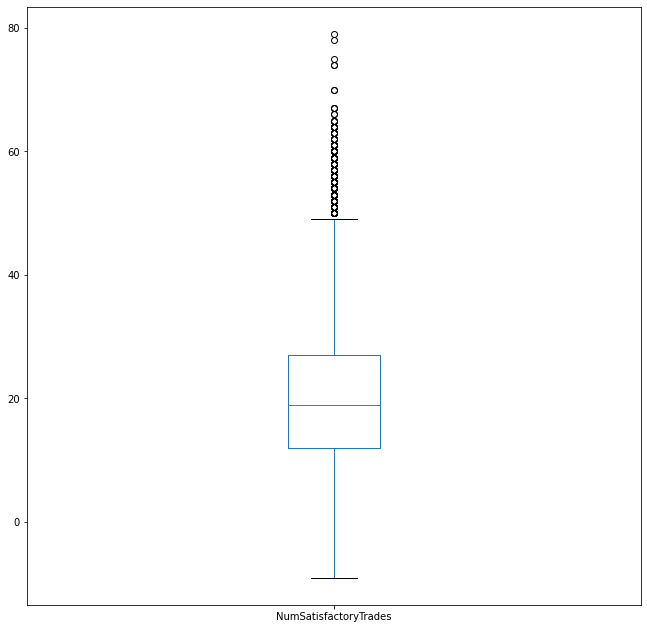

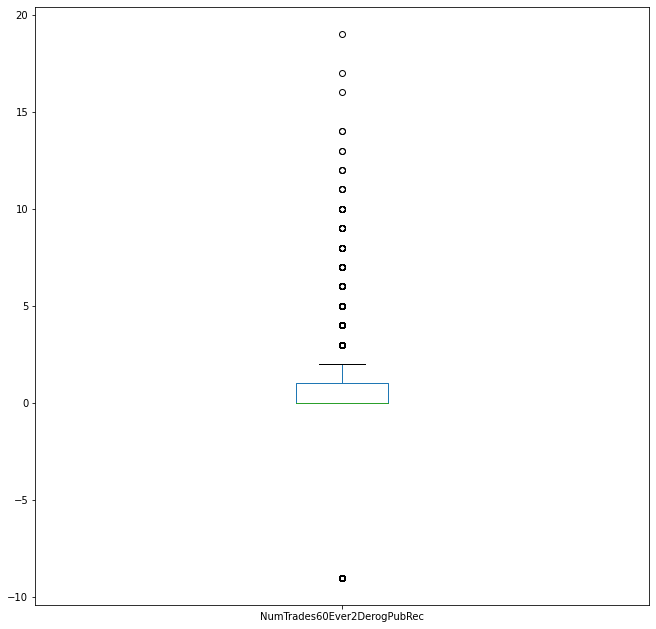

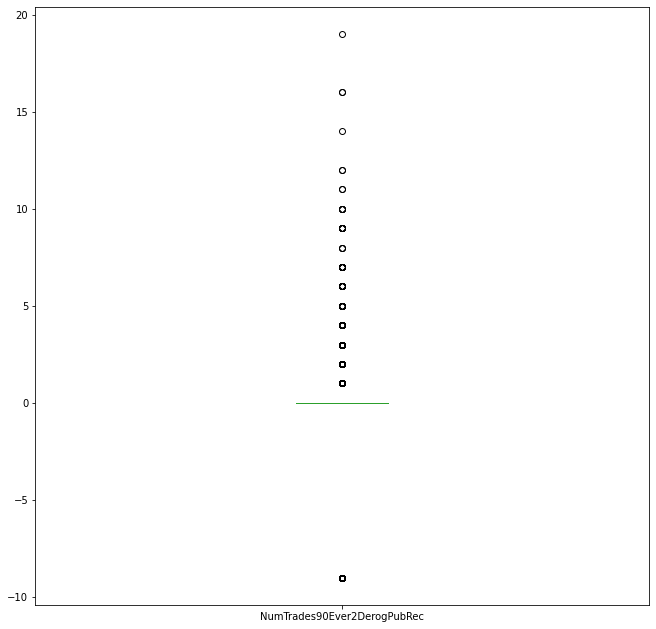

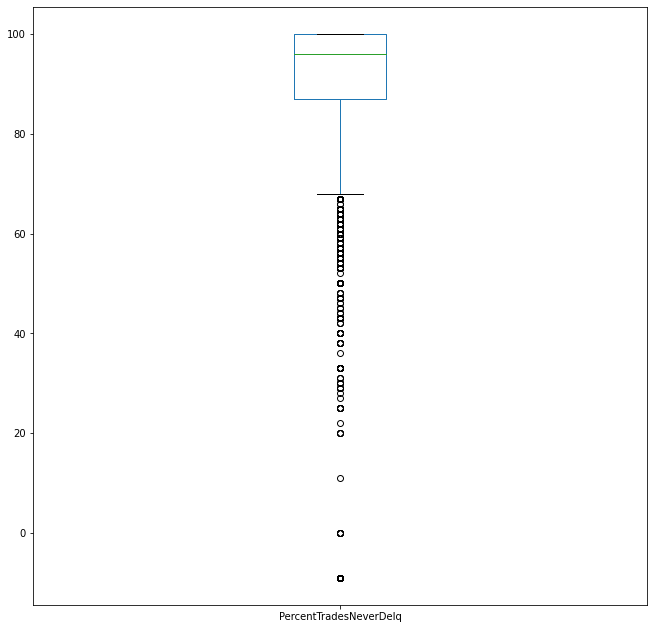

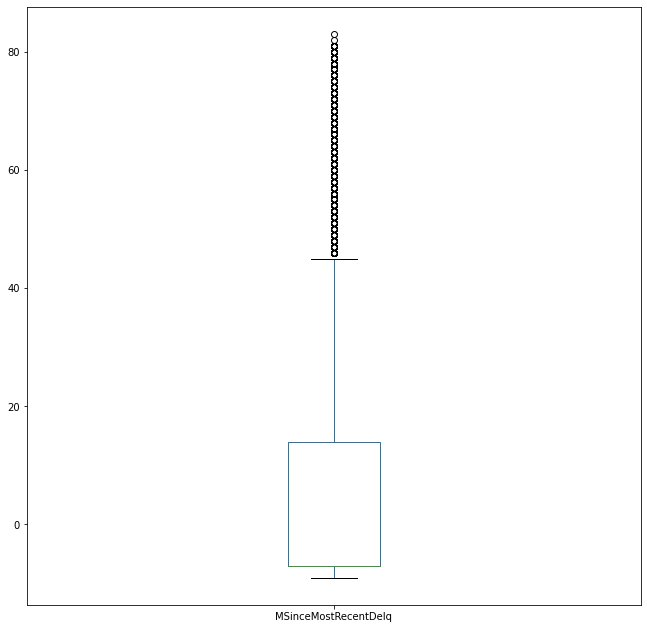

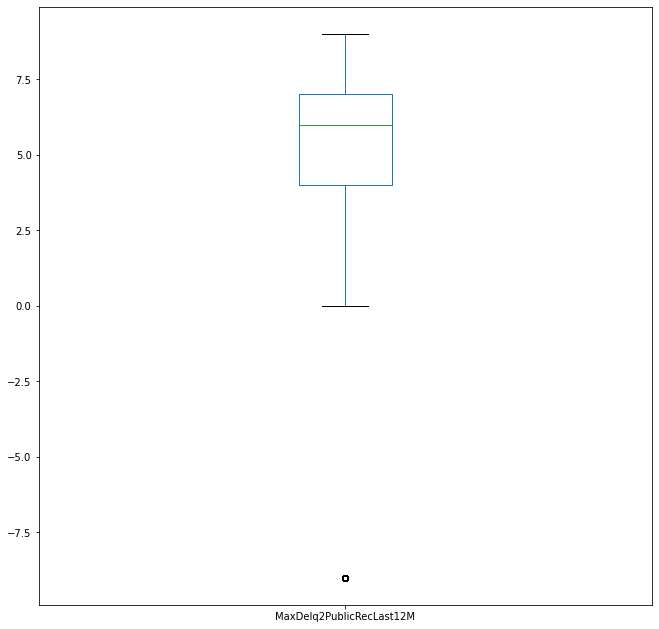

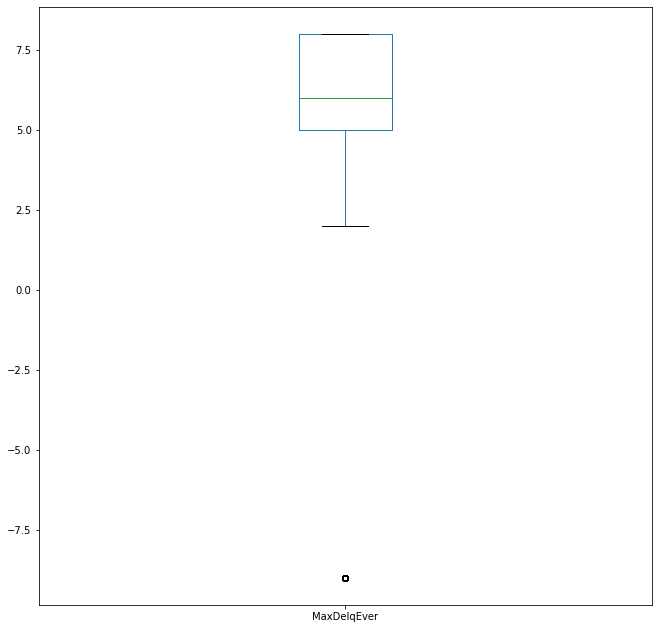

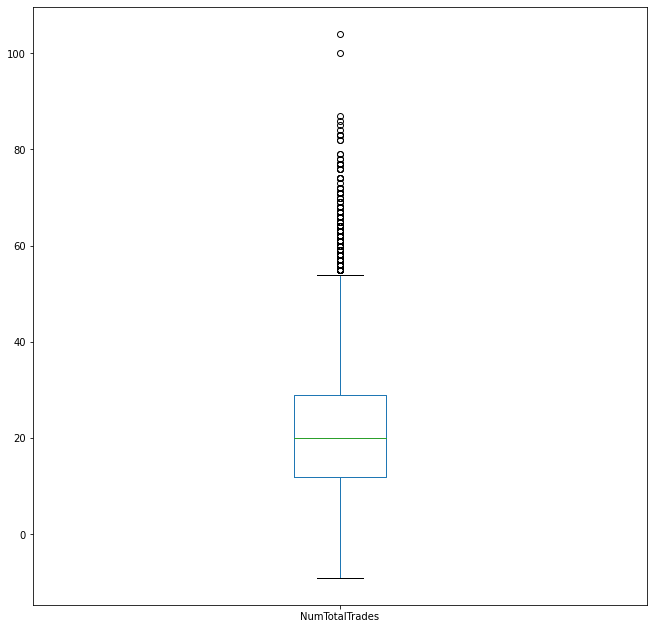

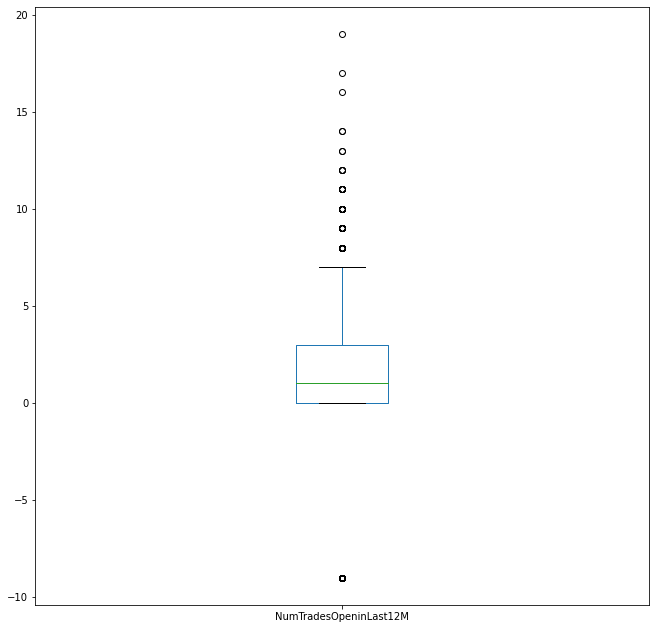

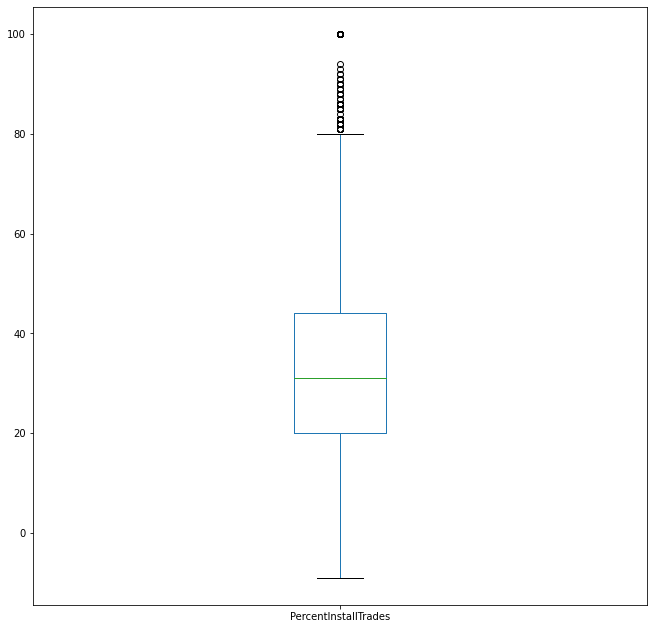

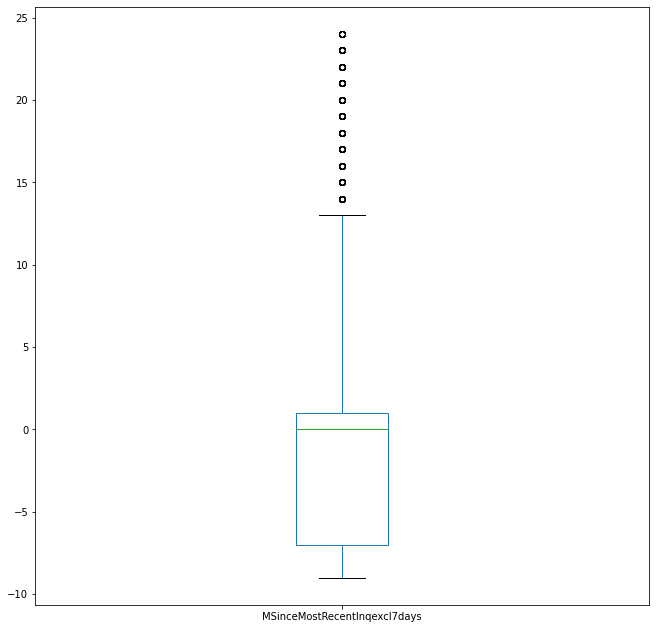

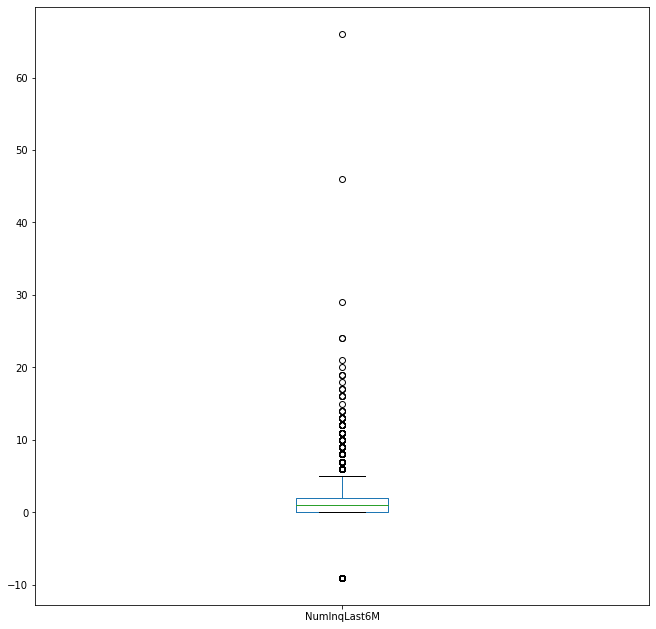

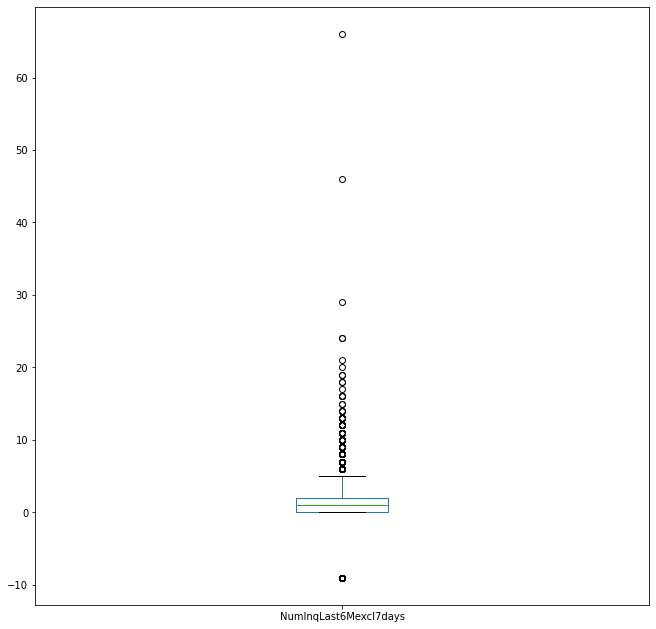

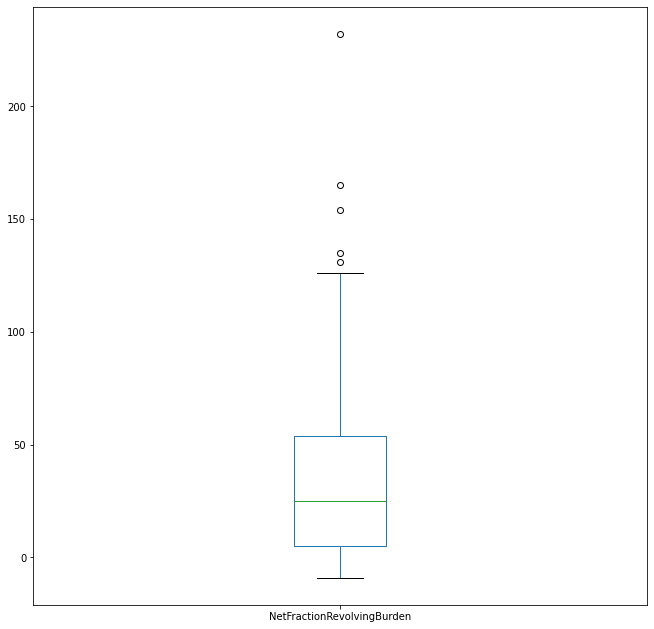

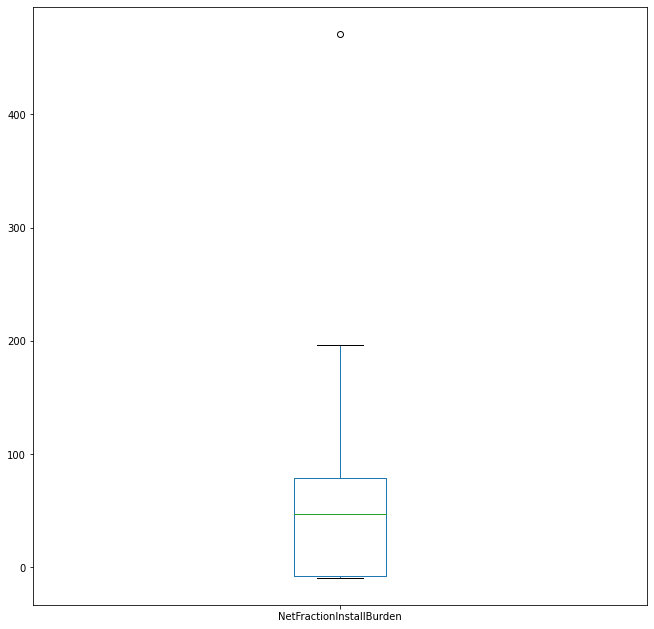

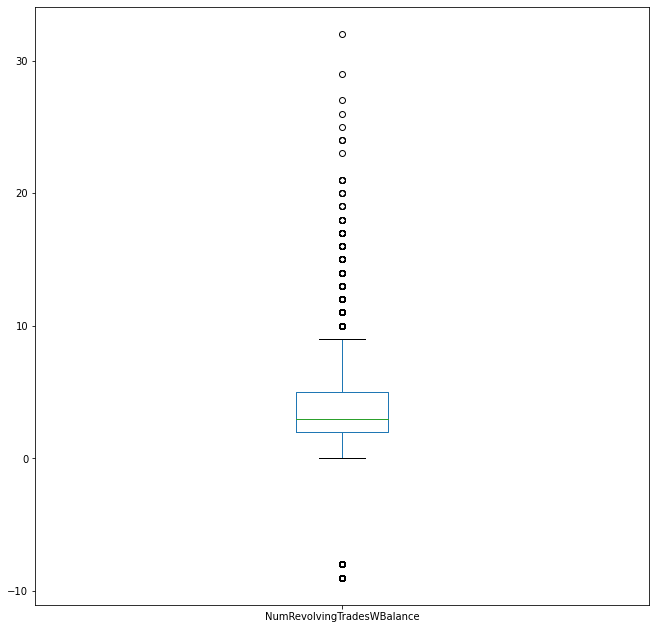

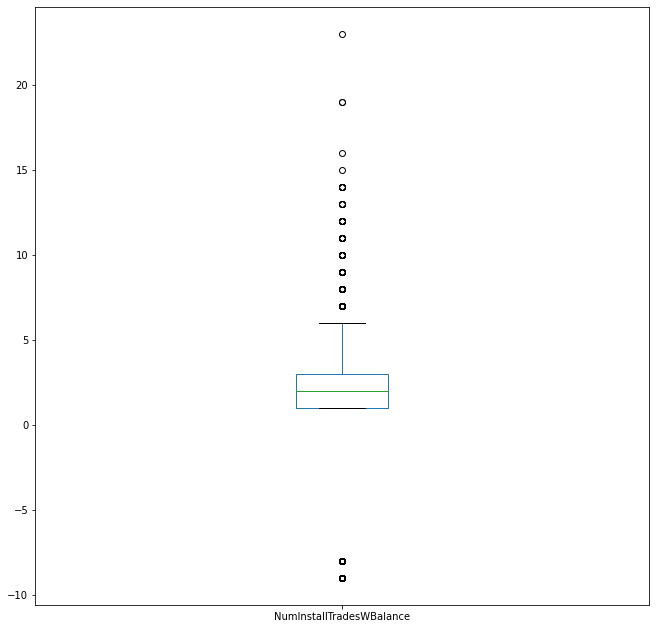

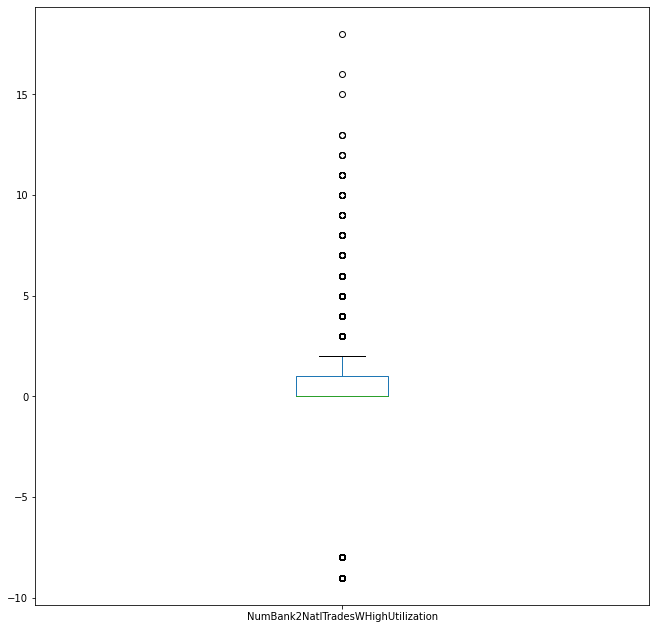

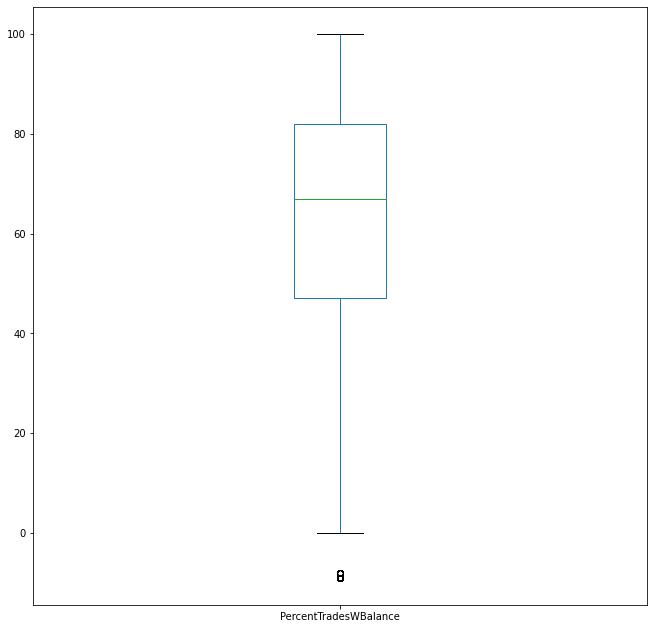

In [61]:
for column in with_explanations.columns[2:]:
    print(column)
    with_explanations.plot(kind="box", x='explanation_label', y=column, figsize=(11,11))

#### Describe

This data would probably be more interesting for a pruned dataset

In [108]:
with_explanations.groupby('explanation_label').describe()

ExternalRiskEstimate  \
                                                                  count   
explanation_label                                                         
['AverageMInFile']                                               1332.0   
['ExternalRiskEstimate', 'MSinceMostRecentDelq']                    1.0   
['ExternalRiskEstimate', 'NumTotalTrades']                          1.0   
['ExternalRiskEstimate', 'PercentTradesWBalance']                   2.0   
['ExternalRiskEstimate']                                          629.0   
['MSinceMostRecentDelq']                                          154.0   
['MSinceMostRecentInqexcl7days', 'NumRevolvingT...                  1.0   
['MSinceMostRecentInqexcl7days']                                  173.0   
['MSinceMostRecentTradeOpen']                                     136.0   
['MSinceOldestTradeOpen', 'ExternalRiskEstimate']                   2.0   
['MSinceOldestTradeOpen', 'MSinceMostRecentDelq']                   1.0   
['MSinceOldestTradeOpen', 'MSinceMostRecentInqe...                  3.0   
['MSinceOldestTradeOpen', 'MSinceMostRecentTrad...                  3.0   
['MSinceOldestTradeOpen', 'MaxDelqEver']                            1.0   
['MSinceOldestTradeOpen', 'NetFractionRevolving...                  1.0   
['MSinceOldestTradeOpen', 'NumInstallTradesWBal...                  6.0   
['MSinceOldestTradeOpen', 'NumSatisfactoryTrades']                  2.0   
['MSinceOldestTradeOpen', 'NumTotalTrades']                         1.0   
['MSinceOldestTradeOpen', 'PercentInstallTrades']                   2.0   
['MSinceOldestTradeOpen']                                        1121.0   
['MaxDelq2PublicRecLast12M']                                       76.0   
['MaxDelqEver']                                                   106.0   
['NetFractionInstallBurden']                                      642.0   
['NetFractionRevolvingBurden']                                   1922.0   
['NumBank2NatlTradesWHighUtilization']                             23.0   
['NumInqLast6M']                                                   32.0   
['NumInqLast6Mexcl7days']                                          37.0   
['NumInstallTradesWBalance']                                      182.0   
['NumRevolvingTradesWBalance']                                    118.0   
['NumSatisfactoryTrades']                                         329.0   
['NumTotalTrades']                                                606.0   
['NumTrades60Ever2DerogPubRec']                                    12.0   
['NumTrades90Ever2DerogPubRec']                                     5.0   
['NumTradesOpeninLast12M']                                         83.0   
['PercentInstallTrades', 'AverageMInFile']                          1.0   
['PercentInstallTrades', 'MSinceMostRecentDelq']                    1.0   
['PercentInstallTrades', 'PercentTradesNeverDelq']                  1.0   
['PercentInstallTrades']                                          703.0   
['PercentTradesNeverDelq', 'MSinceOldestTradeOp...                  1.0   
['PercentTradesNeverDelq', 'MaxDelq2PublicRecLa...                  1.0   
['PercentTradesNeverDelq', 'MaxDelqEver']                           3.0   
['PercentTradesNeverDelq', 'NetFractionInstallB...                  2.0   
['PercentTradesNeverDelq', 'PercentInstallTrades']                  1.0   
['PercentTradesNeverDelq']                                        445.0   
['PercentTradesWBalance']                                        1555.0   

                                                                          \
                                                         mean        std   
explanation_label                                                          
['AverageMInFile']                                  44.905405  39.894301   
['ExternalRiskEstimate', 'MSinceMostRecentDelq']    76.000000        NaN   
['ExternalRiskEstimate', 'NumTotalTrades']          78.000000        N

## All values in original and pruned

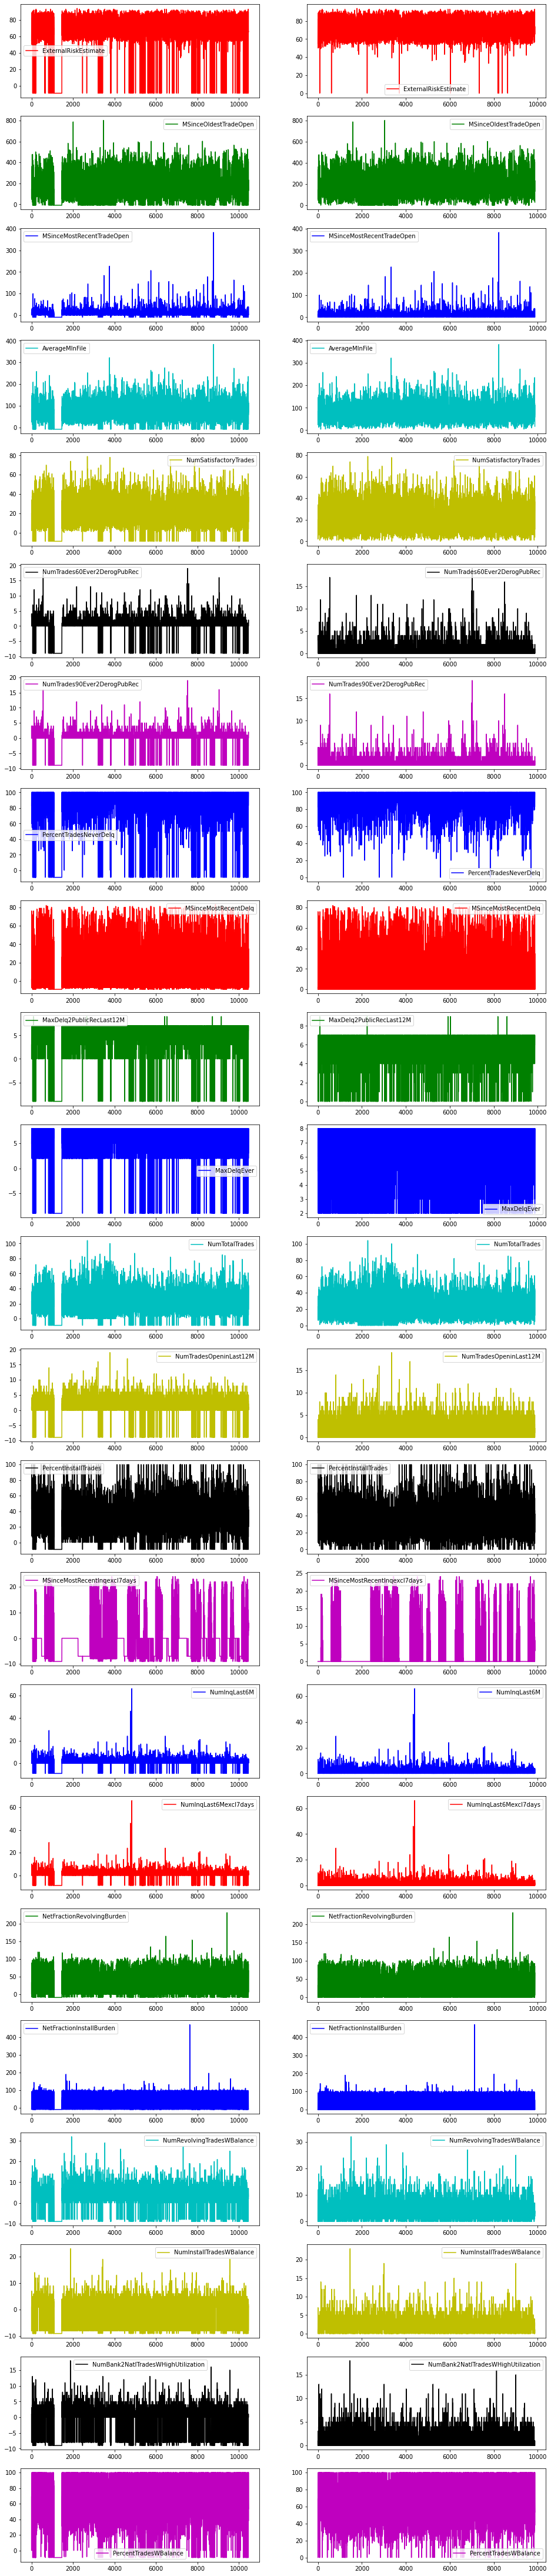

In [64]:
import matplotlib.pyplot as plt
colors = list("rgbcykmbrgbcykmbrgbcykmbrgbcykmbrgbcykmb")
fig, axes = plt.subplots(23,2, figsize=(16,80))
for index, column in enumerate(heloc.columns[1:]):
    heloc.plot(kind="line", y=column, color=colors[index], ax=axes[index][0])
    pruned.plot(kind="line", y=column, color=colors[index], ax=axes[index][1])
